## Lab 06 The Spectrum of the Sun

### Part 1: Wavelength Calibration

In [238]:
# Import all the libraries

import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(9.6, 7.2))

In [204]:
# Import background/bias frame data (60s exposure)
path = '/Users/yuchenzhang/Desktop/BBC/'
background = [] 
for i in range(130,133): 
    background.append(fits.getdata(path +'nov_700000' +str(i) +'.fit', ext=0).astype(np.int))
    #the files have the naming format nov_700000XXX.fit
    
avg_background = np.asarray(background).mean(axis=0)  
#Creates an average bias frame to subtract from all measurements   

In [205]:
# Import dark frame data (10s exposure) 
darks = [] 
for i in range(127,130): 
    darks.append(fits.getdata(path +'nov_700000' +str(i) +'.fit', ext=0).astype(np.int))
    #the files have the naming format nov_700000XXX.fit
    
avg_dark = np.asarray(darks).mean(axis=0)  

In [206]:
# Import sky frame data 10s exposure
sky = [] 
for i in range(124,127): 
    sky.append(fits.getdata(path +'nov_700000' +str(i) +'.fit', ext=0).astype(np.int))
    #the files have the naming format nov_700000XXX.fit
sky_corrected  = [sky - avg_background for sky in sky] # correcting the sky data by substracting the average background
avg_sky = np.asarray(sky_corrected).mean(axis=0)  

In [207]:
# Import helium lamp data (60s exposure)
lamp_he = [] 
for i in range(133,136): 
    lamp_he.append(fits.getdata(path +'nov_700000' +str(i) +'.fit', ext=0).astype(np.int))
    #the files have the naming format nov_700000XXX.fit
lamp_he_corrected = [lamp - avg_background for lamp in lamp_he] # correcting the lamp data by substracting the average background    
avg_lamp_he = np.asarray(lamp_he_corrected).mean(axis=0)  

In [208]:
# Import helium lamp data (60s exposure)
lamp_neon = [] 
for i in range(136,139): 
    lamp_neon.append(fits.getdata(path +'nov_700000' +str(i) +'.fit', ext=0).astype(np.int))
    #the files have the naming format nov_700000XXX.fit
lamp_neon_corrected = [lamp - avg_background for lamp in lamp_neon] 
# correcting the lamp data by substracting the average background    
avg_lamp_neon = np.asarray(lamp_neon_corrected).mean(axis=0)  

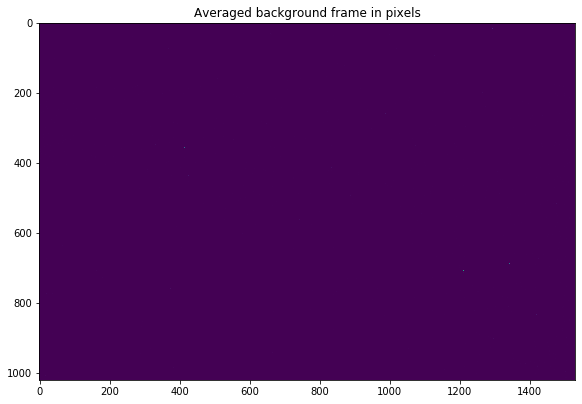

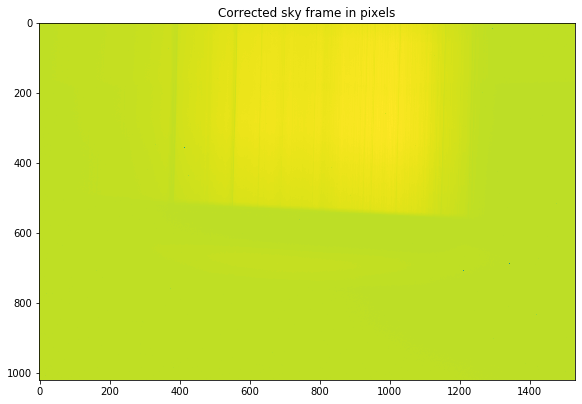

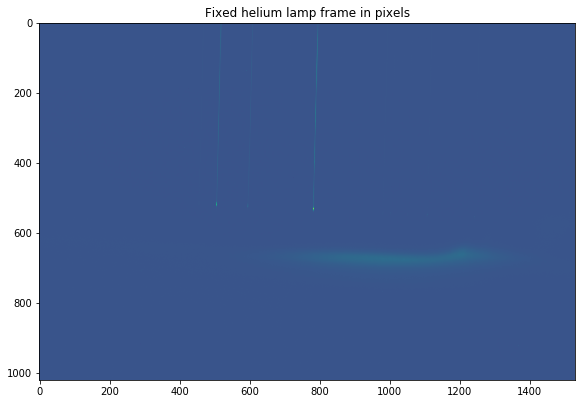

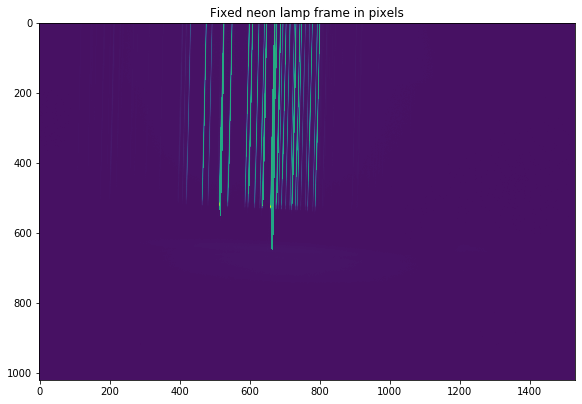

In [209]:
plt.imshow(avg_background) 
plt.title("Averaged background frame in pixels")
plt.show()

plt.imshow(avg_sky) 
plt.title("Corrected sky frame in pixels")
plt.show()

plt.imshow(avg_lamp_he) 
plt.title("Fixed helium lamp frame in pixels")
plt.show()

plt.imshow(avg_lamp_neon) 
plt.title("Fixed neon lamp frame in pixels")
plt.show()

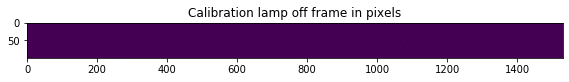

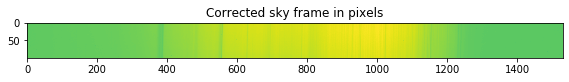

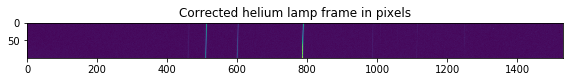

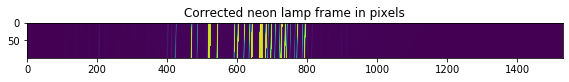

In [210]:
#Now we use array indexing to examine a chosen part of the spectrum to see if it contains the data we need
plt.imshow(avg_background[300:400,:])
plt.title("Calibration lamp off frame in pixels")
plt.show()

plt.imshow(avg_sky[300:400,:])
plt.title("Corrected sky frame in pixels")
plt.show()

plt.imshow(avg_lamp_he[300:400,:])
plt.title("Corrected helium lamp frame in pixels")
plt.show()

plt.imshow(avg_lamp_neon[300:400,:])
plt.title("Corrected neon lamp frame in pixels")
plt.show()

In [211]:
#Averages the value along each column in the region that our spectra look relatively free of contamination
he_good = np.asarray(avg_lamp_he[300:400,:]).mean(axis=0) 
neon_good = np.asarray(avg_lamp_neon[300:400,:]).mean(axis=0) 
sky_good  = np.asarray(avg_sky[300:400,:]).mean(axis=0)

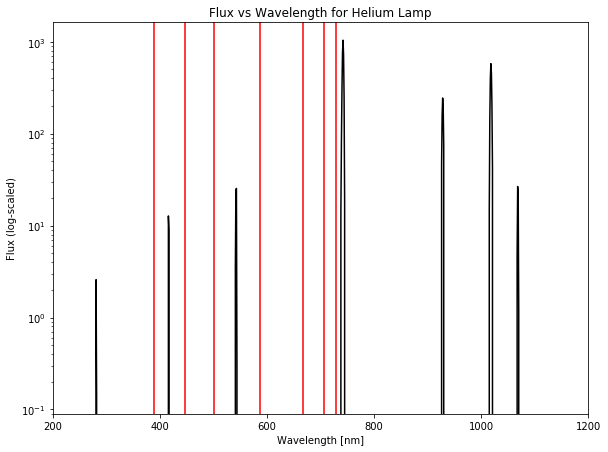

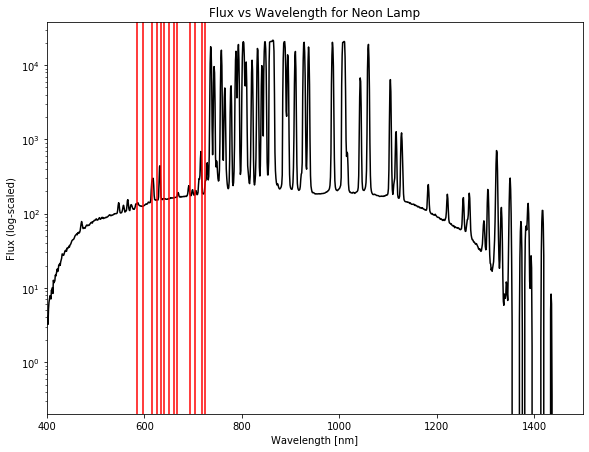

In [244]:
he_flip = np.flip(np.arange(len(he_good)),0)
plt.plot(he_flip, he_good, 'k-')
he_lines =[388.8, 447.1, 501.5, 587.5, 667.8, 706.5, 728.1]
for line in he_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlim(200, 1200)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Flux vs Wavelength for Helium Lamp")
plt.show()

neon_flip = np.flip(np.arange(len(neon_good)),0)
plt.plot(neon_flip, neon_good, 'k-')
neon_lines = [585.25, 597.55, 616.36, 626.65, 633.44, 640.23, 650.65, 659.89, 667.83, 692.96, 703.24, 717.4, 724.52]
for line in neon_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlim(400, 1500)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Flux vs Wavelength for Neon Lamp")
plt.show()

In [220]:
# stretch and shift the lamp data

stretch = 0.43
shift = 268

he_mapping = stretch * he_flip[:] + shift
neon_mapping = stretch * neon_flip[:] + shift

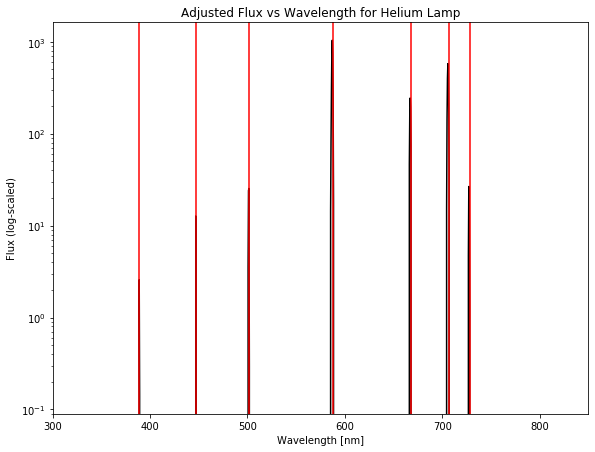

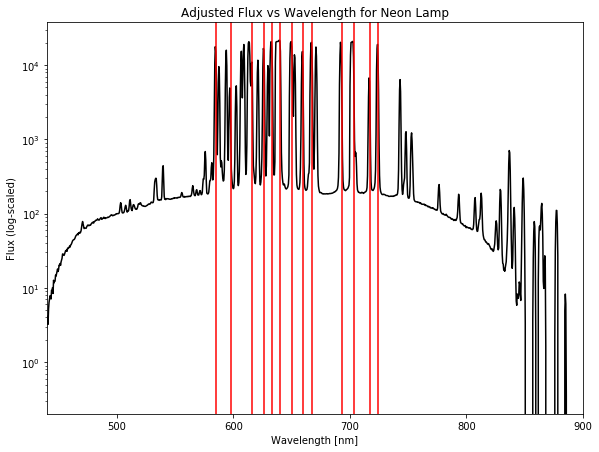

In [221]:
# plot the stretched and shifted lamp data
plt.plot(he_mapping, he_good, 'k-')
for line in he_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlim(300, 850)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Adjusted Flux vs Wavelength for Helium Lamp")
plt.show()

plt.plot(neon_mapping, neon_good, 'k-')
for line in neon_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlim(440,900)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Adjusted Flux vs Wavelength for Neon Lamp")
plt.show()

### Part 2: Solar specturm analysis

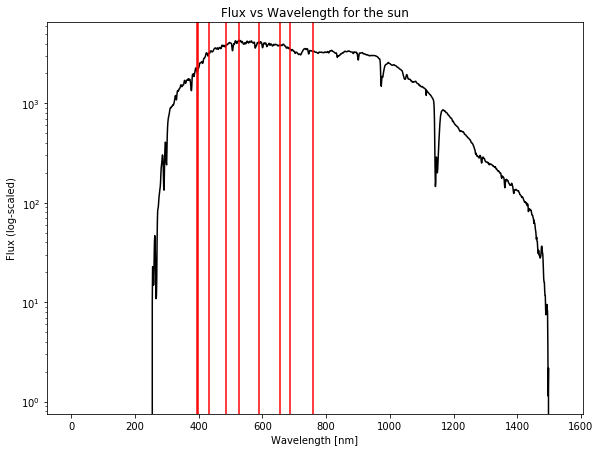

In [222]:
sky_flip = np.flip(np.arange(len(sky_good)),0)
plt.plot(sky_flip, sky_good, 'k-')
sky_lines = [393.4, 396.8, 430.79, 486.1, 527.0, 589.29, 656.3, 686.72, 759.4]
#  I chose K(Ca+), H(Ca+), G(Fe), F(Hβ), E2(Fe), D(Na), C(Hα), B(O2), A(O2)
for line in sky_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Flux vs Wavelength for the sun")
plt.show()

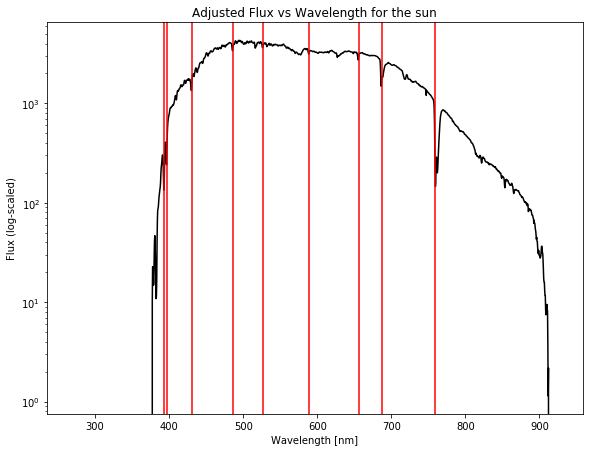

In [223]:
# stretch and shift the sun data
sky_mapping = stretch * sky_flip[:] + shift

# plot the stretched and shifted sun data
plt.plot(sky_mapping, sky_good, 'k-')
for line in sky_lines:
    plt.axvline(line,color='r')
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux (log-scaled)')
plt.title("Adjusted Flux vs Wavelength for the sun")
plt.show()

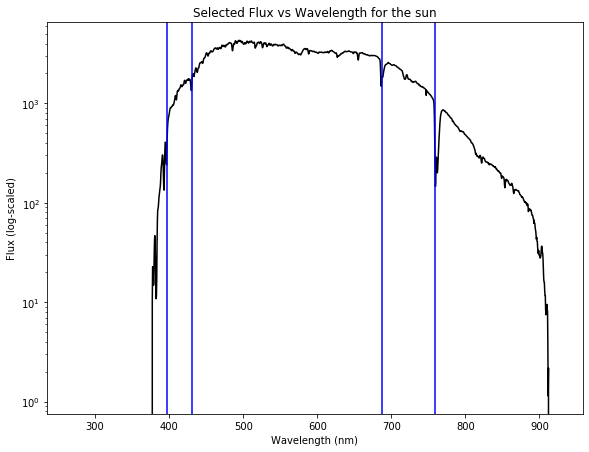

In [225]:
# plot the selected sun lines
plt.plot(sky_mapping, sky_good, 'k-')
selected_lines = [396.8, 430.79, 686.72, 759.4] 
# I selected H(Ca+), G(Fe), B(O2), and A(O2)
for line in selected_lines:
    plt.axvline(line,color='b')
plt.yscale('log')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (log-scaled)')
plt.title("Selected Flux vs Wavelength for the sun")
plt.show()